# Problema 1: Evaluación de Clusterizaciones

Este problema será un ejercicio similar a lo que vimos en la sesión anterior, donde clusterizamos los datos con diferentes algoritmos y evaluamos los resultados. Trabajaremos con la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) del 2016 para clusterizar los distintos tipos de hogares que existen en México. Puedes encontrar la descripción general de la encuesta [aquí](https://www.inegi.org.mx/programas/enigh/nc/2016/) y la descripción de las variables contenidas en la base de datos en los archivos `catalogo_datos.csv` y `diccionario_datos.csv`. Usaremos las siguientes librerías y funciones:

In [4]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

**1.** Comenzaremos por importar los datos del archivo `conjunto_de_datos_concentradohogar_enigh_2016_ns.csv` a un dataframe y limpiar los datos existentes. Explica lo que hace cada una de las siguientes líneas de código y su propósito:

In [30]:
df=pd.read_csv('datos_concentradohogar_enigh_2016/conjunto_de_datos_concentradohogar_enigh_2016_ns.csv')
df['sexo_jefe'] = df['sexo_jefe'].apply(lambda x: x - 1)
eliminar=['foliohog','ageb','tam_loc','est_socio','est_dis','upm','factor']
df2=df.drop(eliminar, axis=1)
df2=df2[df2.rentas<30000000]

**2.** El siguiente código genera una gráfica de la matriz de covarianza de los datos en la tabla. En base a los resultados genera una lista (como en la segunda celda de abajo) de qué variables utilizarías o eliminarías para el análisis de la clusterización. Puedes utilizar el criterio de covarianza o argumentar qué variables tienen el mayor poder de explicación.

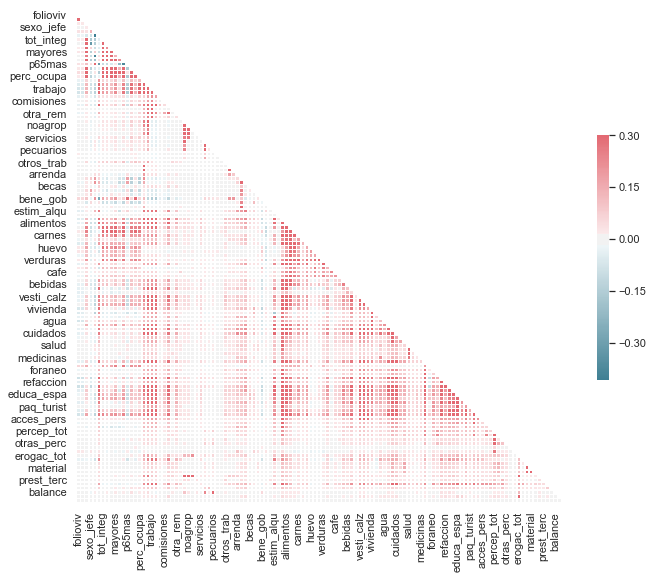

In [6]:
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
#lista_ejemplo
variables=[
"folioviv",
"sexo_jefe",
"tot_integ",
"mayores"
]

**3.** Crea un dataframe que contenga únicamente las variables seleccionadas en el inciso anterior y estandariza los datos. Asegúrate de que el dataframe resultante no tenga entradas vacías o NaNs.

**4.** 

**a)** Utiliza el algoritmo de K-Means clustering con el dataframe resultante el inciso anterior. Emplea el método de distorsión visto en clase para seleccionar el número de clusters $k$. ¿Se obtiene un valor claro apartir de esta gráfica? Elije un valor del parámetro. 

**b)** Obtén una clusterización final con ese parámetro, pues se utilizará en el inciso 6. Añade las etiquetas como una columna adicional al dataframe.

**5.** Para este inciso escoge uno de los siguientes algoritmos vistos en clase: `DBSCAN` o `Agglomerative Hierarchical Clustering`.

**a)** Utiliza el método de la Silueta para seleccionar los parámetros del algoritmo correspondiente. 

**b)** Obtén una clusterización final, que se utilizará en el inciso 6. Añade las etiquetas como una columna adicional al dataframe.

**6.** La siguiente función imprime una descripción estadística de las distintas variables en cada uno de los clusters. Toma como parámetros el dataframe (no estandarizado) `df`, el nombre de la columna de etiquetas `label_column` (como string) y la lista de variables seleccionadas en el inciso 2 `variable_list`. 

In [26]:
def describe_clusters(df,label_column,variable_list=variables):
    df=df.dropna()
    n_clusters=len(df[label_column].unique())
    for i in range(n_clusters):
        c_aux=df[df[label_column]==i]
        print ('-------------------- cluster ',i,'---------------------------')
        print ('No de hogares: ',len(c_aux))
        
        for var in variable_list:
            #c_aux.hist(column=var)
            des=c_aux.describe(percentiles=[.1,.2,.3, .4,.5, .6,.7,.8,.9])
            print (var,'media ',des[var]['mean'],'[',des[var]['min'],',',des[var]['max'],']',
            '(',des[var]['10%'],',',des[var]['20%'],',',des[var]['30%'],',',des[var]['40%'],',',
            des[var]['50%'],',',des[var]['60%'],',',des[var]['70%'],',',des[var]['80%'],',',des[var]['90%'],')')
            print()            

Utiliza la función para obtener descripciones de las clusterizaciones finales obtenidas en los incisos 4 y 5. Analiza la información y responde las siguientes preguntas:
- ¿Qué tipos de familias se encuentran en cada caso? Haz una breve descripción.
- ¿Qué variables consideras son más relevantes para poder diferenciar unas familias de otras?
- ¿Cómo difieren las clusterizaciones de los dos algoritmos entre sí?
- Según el resumen obtenido de la función, ¿cuál de los dos resultados de la clusterización crees que sea mejor? Argumenta.

# Problema 2: PCA y Clusterización

En este problema continuaremos con el análisis de los datos que vimos en la última sesión: encuestas a estudiantes acerca del rendimiento de sus profesores en distintos cursos. Haremos un Análisis de Componentes Principales y Clusterización, analizando los resultados finales.

**1.** Importa la base de datos del archivo `turkiye-student-evaluation_generic.csv` y filtra únicamente las columnas que corresponden a las preguntas categóticas Q1 a Q28 para crear un dataframe llamado `questions_df`.

**2.** Escoge uno de los tres algoritmos siguientes: `K-Means Clustering`, `DBSCAN` o `Agglomerative Hierarchical Clustering`. 

Haz una clusterización de los datos, elijiendo los parámetros utilizando el Método de Distorición o el Método de la Silueta. Añade las etiquetas a una columna nueva del dataframe `questions_df`. Finalmente, grafica los datos de `questions_df` (elije 2 ejes) coloreando cada punto según el cluster correspondiente.

**3.** En la siguientes celdas se implementa un Análisis de Componentes Principales (PCA) con únicamente 2 componentes principales. Esto lo hacemos debido a que deseamos graficar los resultados en 2 dimensiones. 

Utiliza el comando `pca.explained_variance_ratio_.sum()`, que aparece en la celda, para graficar la varianza total explicada por los componentes principales, variando el número de componentes entre 1 y 28. Basado en la gráfica, ¿es razonable utilizar 2 componentes principales?

In [80]:
from sklearn.decomposition import PCA

components=2
X=questions_df-questions_df.mean() #debemos restar la media a los datos para centrarlos

pca = PCA(n_components=components)
principalComponents = pca.fit_transform(X) #transforma los datos al espacio de las componentes principales

print('Porcentaje de la varianza explicada por', components,'componente(s): ',pca.explained_variance_ratio_.sum())
print()

principal_df = pd.DataFrame(data = principalComponents) #crea un dataframe de los datos transformados
print("Comparación de datos en ambos espacios:",principal_df.shape, questions_df.shape) #tienen el mismo no. de columnas
print()
print()

print("Identificar ejes de los componentes")
print(pca.components_) #los vectores en el espacio original (X) que describen los ejes de los componentes principales 
print()

print("Al tranformarlos al espacio de los componentes principales obtenemos vectores (casi) unitarios")
print(pca.transform(pca.components_[0].reshape(1,-1))) #(1,0)
print(pca.transform(pca.components_[1].reshape(1,-1))) #(0,1)

Porcentaje de la varianza explicada por 2 componente(s):  0.8671381678891085

Comparación de datos en ambos espacios: (5820, 2) (5820, 28)


Identificar ejes de los componentes
[[-0.17872911 -0.18696044 -0.18218529 -0.18417011 -0.19021407 -0.18708119
  -0.1878324  -0.18678649 -0.18239155 -0.19236264 -0.18669482 -0.1862382
  -0.19227288 -0.19118139 -0.19023804 -0.19628846 -0.18088329 -0.19357879
  -0.19273593 -0.19319851 -0.19110602 -0.19085911 -0.19483935 -0.19313335
  -0.18889574 -0.19086936 -0.18975553 -0.18866989]
 [ 0.35645673  0.23223503  0.11551155  0.24533528  0.20717759  0.20075314
   0.24290761  0.24901577  0.12919618  0.1891172   0.1105148   0.21203229
  -0.1061603  -0.15629705 -0.15533847 -0.04865706 -0.26259518 -0.1290584
  -0.15363392 -0.19670071 -0.22007368 -0.22347198 -0.10278122 -0.06210583
  -0.20787213 -0.12045026 -0.07204025 -0.21401477]]

Al tranformarlos al espacio de los componentes principales obtenemos vectores (casi) unitarios
[[1.00000000e+00 5.03511018e-17]]


**4.** Repite el inciso 2, con el mismo algoritmo y método de evaluación, pero ahora utiliza los datos de `principal_df` para la clusterización. Grafica los datos de `principal_df`, coloreando cada punto según el cluster correspondiente.

**5.** Ahora compararemos los resultados de los incisos 2 y 4. Responde las siguientes preguntas:

- ¿En qué caso se obtuvo la distinción más clara de clusters según la gráfica?
- ¿Cuál es la interpretación de los clusters y centroides en el espacio original?
- ¿Cuál es la interpretación de los clusters y centroides en el espacio de los componentes principales?
- ¿Se obtuvieron los mismos parámetros para el algoritmo en ambos casos? 
- ¿Consideras que alguno de los resultados es mejor? Argumenta.